In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14

import seaborn as sns
palette = sns.color_palette('Paired', 10)

# Set random seed 
RSEED = 100

In [184]:
# LOAD DATA TO BE MANIPULATED

data = pd.read_csv("../00_Data_Sets/100_k_dataset_2015.csv");

In [225]:
data = pd.read_csv("../00_Data_Sets/1_mio_dataset_2010_2014.csv");
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,manhattan,euclidean,haversine
count,1.111247e+06,1.111247e+06,1.111247e+06,1.111247e+06,1.111247e+06,1.111247e+06,1.111247e+06,1.111247e+06,1.111247e+06,1.111247e+06,1.111247e+06
mean,1.137382e+01,-7.397545e+01,4.075076e+01,-7.397452e+01,4.075112e+01,1.580757e+00,2.139146e-02,2.281358e-02,4.420505e-02,3.417393e-02,3.339890e+00
std,9.419871e+00,3.706495e-02,2.881575e-02,3.634096e-02,3.217049e-02,1.147561e+00,2.348663e-02,3.435989e-02,5.126446e-02,3.927367e-02,3.667883e+00
min,2.500000e+00,-7.496814e+01,4.005272e+01,-7.496426e+01,4.004118e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399236e+01,4.073639e+01,-7.399166e+01,4.073534e+01,1.000000e+00,7.000000e-03,6.173000e-03,1.650600e-02,1.291544e-02,1.266198e+00
50%,8.500000e+00,-7.398216e+01,4.075322e+01,-7.398070e+01,4.075372e+01,1.000000e+00,1.429900e-02,1.277200e-02,2.830500e-02,2.194911e-02,2.170904e+00
75%,1.290000e+01,-7.396837e+01,4.076735e+01,-7.396549e+01,4.076827e+01,2.000000e+00,2.738500e-02,2.406800e-02,5.120050e-02,3.899865e-02,3.946707e+00
max,1.000000e+02,-7.270287e+01,4.169685e+01,-7.269484e+01,4.171463e+01,5.000000e+00,8.735150e-01,1.271893e+00,1.697287e+00,1.272236e+00,1.162626e+02


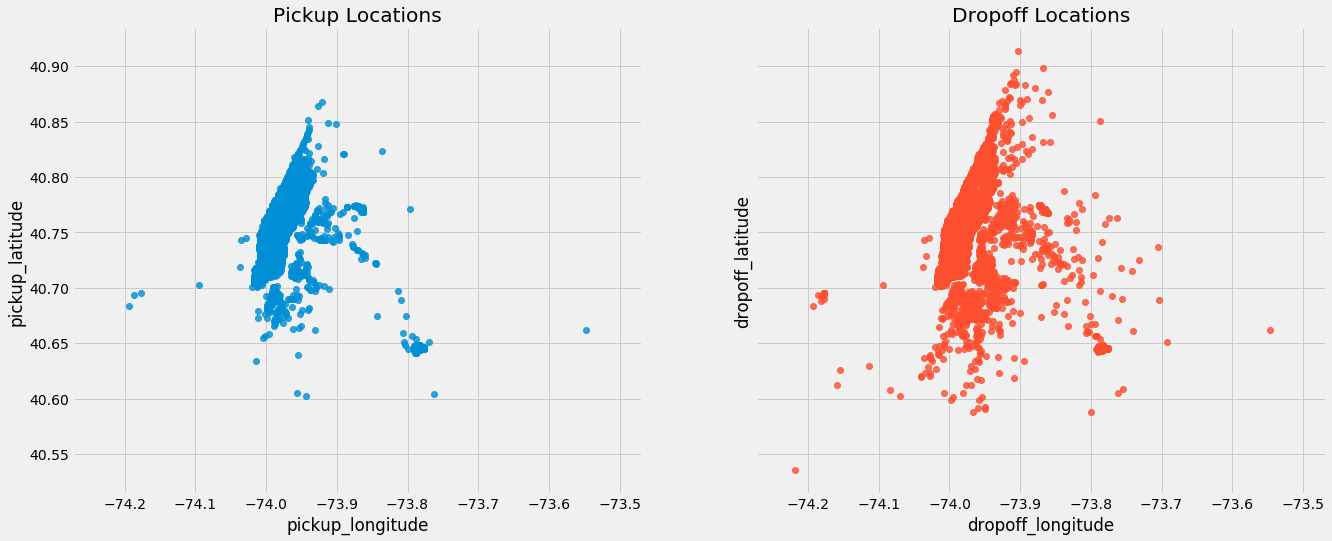

In [187]:
# Print Locations

fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot Longitude (x) and Latitude (y)
sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = data.sample(10000, random_state = RSEED), ax = axes[0]);
sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = data.sample(10000, random_state = RSEED), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');

In [188]:
# Create Copy

data_manipulated = data.copy()

In [217]:
from random import random

def make_lat_long_outlier(variable):
    random_float_is_outlier = random()
    random_float_is_negative = random()    
    random_float_outlier = random() * 2
    
    if random_float_is_outlier > 0.999:
        if random_float_is_negative > 0.5:
            return random_float_outlier * (-1)
        return random_float_outlier
    
    return 0;

In [218]:
data_manipulated.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,manhattan,euclidean,haversine
count,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000
mean,12.898841,-73.973947,40.750973,-73.973819,40.751631,1.526672,0.021339,0.023760,0.045099,0.034898,3.394644
std,10.835837,0.080698,0.074508,0.080000,0.076385,1.075492,0.023589,0.035833,0.052817,0.040527,3.764279
min,2.500000,-75.177467,39.643696,-75.025246,39.643818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,-73.992088,40.736625,-73.991417,40.735573,1.000000,0.006870,0.006187,0.016201,0.012678,1.242527
50%,9.500000,-73.981911,40.753750,-73.980026,40.754349,1.000000,0.013760,0.012672,0.027721,0.021516,2.120602
75%,14.500000,-73.967453,40.768311,-73.963211,40.769464,2.000000,0.026730,0.024231,0.050611,0.038623,3.907561
max,100.000000,-72.778069,41.830070,-72.776558,41.840466,5.000000,0.281437,0.377335,0.495525,0.380997,34.818911


In [219]:
# Create random outliers (might be incorrect!)

data_manipulated = data.copy()

data_manipulated['pickup_longitude'] = data_manipulated['pickup_longitude'] + data_manipulated['pickup_longitude'].apply(make_lat_long_outlier)
data_manipulated['pickup_latitude'] = data_manipulated['pickup_latitude'] + data_manipulated['pickup_latitude'].apply(make_lat_long_outlier)
data_manipulated['dropoff_longitude'] = data_manipulated['dropoff_longitude'] + data_manipulated['dropoff_longitude'].apply(make_lat_long_outlier)
data_manipulated['dropoff_latitude'] = data_manipulated['dropoff_latitude'] + data_manipulated['dropoff_latitude'].apply(make_lat_long_outlier)

data_manipulated.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,manhattan,euclidean,haversine
count,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000
mean,12.898841,-73.974299,40.750911,-73.973657,40.751504,1.526672,0.021339,0.023760,0.045099,0.034898,3.394644
std,10.835837,0.052713,0.045533,0.054085,0.047730,1.075492,0.023589,0.035833,0.052817,0.040527,3.764279
min,2.500000,-75.894888,38.858700,-75.948448,38.925379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,-73.992058,40.736721,-73.991386,40.735695,1.000000,0.006870,0.006187,0.016201,0.012678,1.242527
50%,9.500000,-73.981918,40.753765,-73.980019,40.754349,1.000000,0.013760,0.012672,0.027721,0.021516,2.120602
75%,14.500000,-73.967552,40.768246,-73.963310,40.769371,2.000000,0.026730,0.024231,0.050611,0.038623,3.907561
max,100.000000,-71.996341,42.717773,-71.906212,42.738758,5.000000,0.281437,0.377335,0.495525,0.380997,34.818911


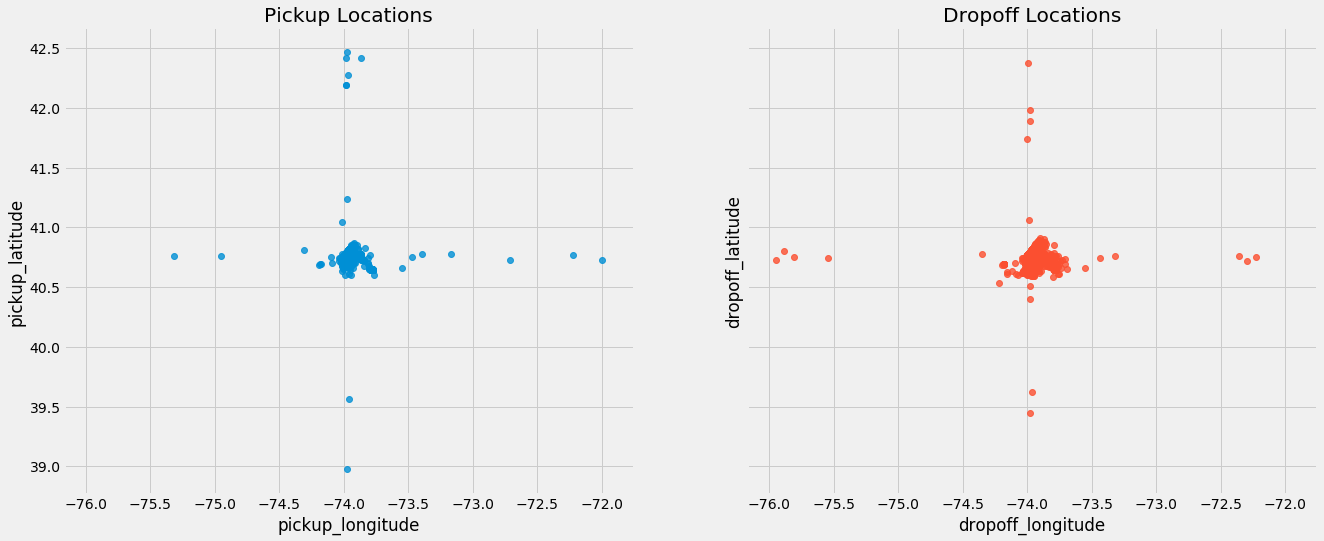

In [220]:
# Print Locations

fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot Longitude (x) and Latitude (y)
sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = data_manipulated.sample(10000, random_state = RSEED), ax = axes[0]);
sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = data_manipulated.sample(10000, random_state = RSEED), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');

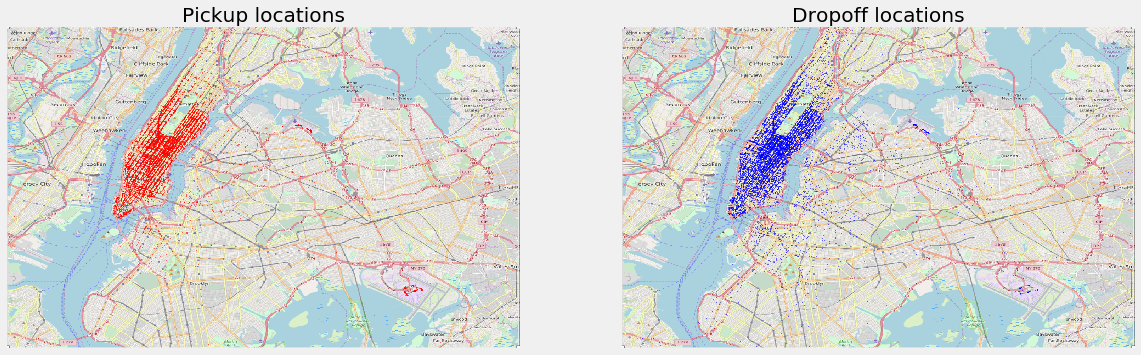

In [193]:
BB_zoom = (-74.1, -73.7, 40.6, 40.85)
nyc_map_zoom = plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true')

# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2, color = False):
    fig, axs = plt.subplots(1, 2, figsize=(18, 22))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].axis('off')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].axis('off')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
    
# plot training data on map zoomed in
plot_on_map(data_manipulated.sample(9_000, random_state = RSEED), 
            BB_zoom, nyc_map_zoom, s=0.2, alpha=0.75)

In [194]:
# SAVE DATASET

data_manipulated.to_csv('01_Location/location_outlier_01.csv', index = False)

In [221]:
data_check = pd.read_csv("01_Location/location_outlier_01.csv");
data_check.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,manhattan,euclidean,haversine
count,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000,98944.000000
mean,12.898841,-73.974233,40.750791,-73.973752,40.751564,1.526672,0.021339,0.023760,0.045099,0.034898,3.394644
std,10.835837,0.050154,0.043502,0.048145,0.044432,1.075492,0.023589,0.035833,0.052817,0.040527,3.764279
min,2.500000,-75.962659,38.755096,-75.990381,38.757102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,-73.992058,40.736710,-73.991386,40.735709,1.000000,0.006870,0.006187,0.016201,0.012678,1.242527
50%,9.500000,-73.981918,40.753759,-73.980019,40.754341,1.000000,0.013760,0.012672,0.027721,0.021516,2.120602
75%,14.500000,-73.967567,40.768243,-73.963310,40.769363,2.000000,0.026730,0.024231,0.050611,0.038623,3.907561
max,100.000000,-72.084356,42.766717,-71.983569,42.743535,5.000000,0.281437,0.377335,0.495525,0.380997,34.818911
